# Interacciones de realimentación Actina-Regulador durante la endocitosis

La endocitosis mediada por clatrina, es un proceso celular por el cual las células internalizan receptores de membrana y sus ligandos extracelulares, es un componente importante de la regulación en señalización celular. La polimerización de la actina está involucrada en la endocitosis en varios grados dependiendo del contexto celular. En levaduras, la endocitosis mediada por clatrina requiere un pulso de polimerización de actina y sus reguladores, los cuales reclutan y activan el complejo Arp2/3. 

En el artículo, los investigadores buscaban identificar las interacciones proteína-proteína que primero causaran la aparición de la actina y sus reguladores de manera pulsada, y segundo, determinar los efectos de mutaciones clave y tratamientos con fármacos sobre el ensamblaje de actina y reguladores. Desarrollaron un estudio conjunto modelación/experimentación de la dinámica de la actina y el regulador durante la endocitosis en la levadura Saccharomyces cerevisiae. Trataron dos modelos, uno estocástico que crecía una red tridimensional de actina, y otro modelo más simple de dos variables tipo Fitzhugh-Nagumo, este modelo incluye una realimentación negativa de la F-actina sobre los reguladores Arp2/3, y fue el modelo que nos propusimos a analizar con las herramientas matemáticas aprendidas en el curso.


La polimerización y despolimerización de la actina durante la endocitosis mediada por clatrina ocurre como parte del ensamblaje y des-ensamblaje de un parche de proteínas que contiene más de 60 proteínas diferentes, llegando en una secuencia definida. Inicialmente las proteínas de carga y adaptadoras se ensamblan, seguidas por un revestimiento que incluye clatrina y otras proteínas. El revestimiento recluta reguladores de actina, a veces denominados "factores promotores de nucleación". Los reguladores, incluyendo Las17 (levadura WASP), reclutan y activan el complejo Arp2/3 para nuclear nuevos filamentos de actina desde el lado de los filamentos existentes. Después de que comienza la polimerización de actina, se produce la flexión de la membrana, se forma un túbulo y finalmente se aprieta en una vesícula, seguida en última instancia por la disolución del revestimiento proteico.

El modelo trata la dinámica de la polimerización de actina y el regulador Las17. Los investigadores se centraron en este regulador debido a que en sus experimentos in vitro, vieron que tenía actividad de nucleación más fuerte. Además, los otros reguladores estudiados aunque con actividad de nucleación más fuerte, tenían una actividad motora fuera del análisis.


## Modelo FitzHugh-Nagumo

Es una simplificación en dos dimensiones del modelo de Hodgkin-Huxley para la generación de picos en potencial de acción en axón de calamar gigante. 

El modelo consiste de una variable que tiene una no linealidad cúbica que permite auto excitación regenerativa vía realimentación positiva, y una variable de recuperación con linealidad dinámica que provee una realimentación negativa más lenta.

El modelo se puede escribir de forma abstracta de la forma:

$$
\begin{eqnarray}
\frac{dV}{dt} & = & f(V) – W + I, \\
\frac{dW}{dt} & = & a(b V – c W), \\
\end{eqnarray}
$$

Donde $f(V)$ es un polinomio de tercer grado, $I$ representa un estímulo externo y $a, b, c$, son parámetros constantes.
Mientras que el modelo de Hodgkin-Huxley es más realista y biofísicamente sólido, sólo se pueden observar proyecciones de sus trayectorias de fase de cuatro dimensiones. La simplicidad del modelo FitzHugh-Nagumo permite ver toda la solución de una sola vez. Esto permite una explicación geométrica de importantes fenómenos biológicos relacionados con la excitabilidad neuronal y mecanismos generadores de picos.


In [1]:
from pylab import *
%matplotlib inline
from scipy.integrate import odeint

In [10]:
def ActinLas(s, t):
    L = s[0]
    F = s[1]
    LDot = K0 * L * L * (L2 - L) - alpha * Kbr * L * F
    FDot = Kbr * l * L * F - Ksev * F
    return array([LDot, FDot])

def ActinLas2(s, t):
    L = s[0]
    F = s[1]
    LDot = K0 * L * L * (L2 - L) - alpha * Kbr1 * L * F
    FDot = Kbr1 * l * L * F - Ksev1 * F
    return array([LDot, FDot])

In [11]:
Kbr = 0.000957
Ksev = 0.427
K0 = 0.0000393
alpha = 0.136
l = 30.
L2 = 101.



B = Ksev / (Kbr * l)
A = K0 / (Kbr * alpha)
P1 = [0,0]
P2 = [L2,0]
P3 = [B,A*B*(L2-B)]
print 'L2/2 = ',L2/2,'       B = ',B, '       L2 = ',L2
print 'A = ',A
print 'Punto 1 = ',P1
print 'Punto 2 = ',P2
print 'Punto 3 = ',P3

L2/2 =  50.5        B =  14.872866597        L2 =  101.0
A =  0.301954637654
Punto 1 =  [0, 0]
Punto 2 =  [101.0, 0]
Punto 3 =  [14.872866597004528, 386.79101714585215]


## Modelo de interacción entre los filamentos de F-Actina y el regulador Las17

Se utiliza el siguiente modelo:
$$
\begin{array}{rcl}
dL / dt & = & K_0 L^2 \left( L_2 - L\right) - \alpha Kbr L F, \\
dF / dt  & = & Kbr \bar{l} L F - Ksev F.
\end{array}
$$

donde,

$L$, es el número de reguladores Las-17, cuya no linealidad cúbica representa una autocatálisis.
$F$, es la cantidad de filamentos de actina.
$Kbr = 0.957 x 10^{-3} [s^{-1}]$, es la tasa de ramificación por subunidad.
$Ksev = 0.427 [s^{-1}]$, es la tasa de desensamblaje de $F$.
$K_0 = 3.93 x 10^{-5} [s^{-1}]$, es la constante de velocidad de ensamblaje de F.
$\alpha = 0.136$, es la probabilidad de separación de $L$ por evento de ramificación.
$\bar{l} = 30$, es la longitud promedio de un filamento de actina.
$L_2 = 101$, conteo máximo del regulador Las-17.

Con los valores anteriores y las condiciones iniciales $L_0 = 18$ y $F_0 = 1$, los autores del artículo obtienen los siguientes resultados en el dominio del tiempo.

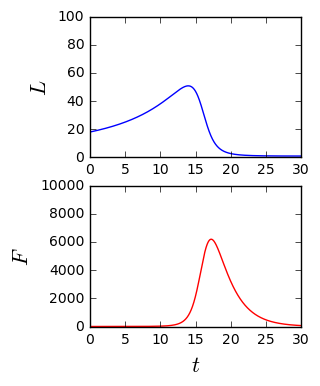

In [12]:
t = linspace(0,100,100000)

s = odeint(ActinLas, [18, 1], t)
subplot (2, 2, 1)
plot(t, s[:, 0], color = 'blue')
axis([0, 30, 0, 100])
ylabel(r'$L$', fontsize = 16)
subplot (2, 2, 3)
plot(t, s[:, 1], color = 'red')
axis([0, 30, 0, 10000])
ylabel(r'$F$', fontsize = 16)

#axis([0, .2, 0, 1.1])
xlabel(r'$t$', fontsize = 16)


De la figura anterior, se observa la autocatálisis del regulador Las-17 (en azul) el cual llega a una cantidad suficiente para inducir la polimerización de filamentos de actina (en rojo) que se van ramificando generando un efecto de realimentación negativa sobre los reguladores; Los filamentos de actina por su parte se van incrementando y van usando los reguladores para su ramificación; teniendo en cuenta que el proceso de ramificación ocurre al mismo tiempo que el de desensamblaje, al ya no haber disponibilidad de reguladores para más ramificaciones, la velocidad de desensamble en ese punto supera a la de ensamblaje y por lo tanto se traduce en una reducción de filamentos de actina.

## Análisis de estabilidad

### Puntos fijos

Igualando el modelo mencionado a 0:

$$
\begin{array}{rcl}
K_0 L^2 \left( L_2 - L\right) - \alpha Kbr L F & = & 0 \\
Kbr \bar{l} L F - Ksev F & = & 0
\end{array}
$$

Se obtienen los siguientes puntos fijos

$$
\begin{array}{lcl}
L^*= 0,\quad\quad \text{ y} \quad F^*=0\\
L^*=L_2,\quad\quad \text{y} \quad F^*=0\\
L^*=b,\quad \quad \text{y} \quad F^*=\frac{K_0 b (L_2 - b)}{\alpha Kbr}\\
\text{Con }\quad \quad\quad \quad b=\frac{Ksev}{Kbr \bar{l}}
\end{array}
$$

Para análizar la estabilidad del sistema es necesario conocer primero la matriz Jacobiana, la cual está dada por:

$$
J = \left[
\begin{array}{cc}
K_0 L \left(2 L_2 - 3 L \right) - \alpha Kbr F & -\alpha Kbr L \\
Kbr \bar{l} F & Kbr \bar{l} L- Ksev
\end{array}
\right]
$$

Reemplazando el primer punto fijo ($L^*=0$ ,$F^*=0$) en la matriz de estabilidad, se tiene lo siguiente

$$
J = \left[
\begin{array}{cc}
0 & 0 \\
0 & - Ksev
\end{array}
\right]
$$

La traza y el determinante de esta matriz son: $\tau = - Ksev$   y $\Delta = 0$.

Este punto fijo tiene como valores propios $\lambda_1 = -Ksev$ y $\lambda_2 = 0$ y como vectores propios $v_1 = (1,0)$ y $v_2 = (0,1)$

Dado que $\lambda_1 < 0$ indica que la dirección $v_1$ es atractora, por otro lado el que $\lambda_2 = 0$ indica que la dirección $v_2$ tiene un tiempo de relajación infinito.

Para el segundo punto fijo ($L^*=L_2$ ,$F^*=0$), la matriz Jacobiana queda de la siguiente manera

$$
J = \left[
\begin{array}{cc}
-K_0 L_2^2 & -\alpha Kbr L_2 \\
0 & Kbr \bar{l} L_2 - Ksev
\end{array}
\right]
$$

La traza y el determinante de esta matriz son: $\tau = -K_0 L_2^2 + Kbr \bar{l} L_2 - Ksev$,   y $\Delta = -K_0 L_2^2 \left( Kbr \bar{l} L_2 - Ksev \right)$.

Para que el punto fijo sea estable,

$$
-K_0 L_2^2 \left( Kbr \bar{l} L_2 - Ksev \right) > 0 \\
\frac{Ksev}{Kbr \bar{l}} > L_2 \\
b > L_2 \\
$$
  
Asi mismo,
$$
-K_0 L_2^2 + Kbr \bar{l} L_2 - Ksev < 0 \\
b > \frac{L_2} {1 + \frac{K_0} {Ksev} L_2^2}
$$

Para que el punto fijo sea atractor, ambas condiciones se deben cumplir para $b$, por lo tanto basta con que $b > L_2$ para que la segunda condición también se dé. 

Este punto fijo tiene como valores propios $\lambda_1 = -K_0 L_2^{2}$ y $\lambda_2 = Kbr \bar{l} L_2^{2} (L_2 - b)$ y como vectores propios $v_1 = (1,0)$ y $v_2 = (\frac{\alpha Kbr L_2}{-K_0 L_2^{2} - Kbr \bar{l} L_2 + Ksev},1)$

Estos valores de $\lambda$ nos confirman que para que $\lambda_2 < 0$ se debe cumplir $b > L_2$.

El Jacobiano para el tercer punto ($L = b$, $F = \frac {K_0 b \left ( L_2 - b \right )} {\alpha Kbr}$) es

$$
J = \left[
\begin{array}{cc}
-K_0 L_2^2 & -\alpha Kbr L_2 \\
0 & Kbr \bar{l} L_2 - Ksev
\end{array}
\right]
$$

La traza y el determinante de esta matriz son: $\tau = b K_0 \left( L_2 - 2 b \right)$,   y $\Delta = b K_0 Ksev \left( L_2 - b \right)$.

Para que el punto fijo sea estable,

$$
b K_0 Ksev \left( L_2 - b \right) > 0 \\
L_2 > b \\
b < L_2 \\
$$
  
Asi mismo,
$$
b K_0 \left( L_2 - 2 b \right) < 0 \\
L_2 < 2 b \\
b > \frac{L_2}{2}
$$

Para que el punto fijo sea atractor, ambas condiciones se deben cumplir para $b$, por lo tanto $\frac{L_2}{2} < b < L_2$. 



En la figura siguiente se observa la estabilidad del sistema en color rojo, es decir, los valores que debe tomar $b$ para que el modelo tenga algún punto fijo estable; donde el punto de bifurcación es $L_2$.

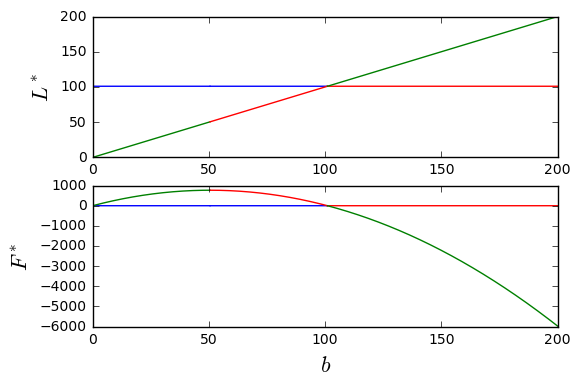

In [13]:
b1 = linspace(0,L2/2,100000)
b2 = linspace(L2/2,L2,100000)
b3 = linspace(L2,200,100000)
subplot (2,1,1)
plot(b1, ones(len(b1))*L2, color = 'blue')
plot(b2, ones(len(b2))*L2, color = 'blue')
plot(b3, ones(len(b3))*L2, color = 'red')
plot(b1[1:], b1[1:], color = 'green')
plot(b2[1:], b2[1:], color = 'red')
plot(b3[1:], b3[1:], color = 'green')
xlabel(r'$b$', fontsize = 16)
ylabel(r'$L^*$', fontsize = 16)

subplot (2,1,2)
plot(b1, zeros(len(b1))*L2, color = 'blue')
plot(b2, zeros(len(b2))*L2, color = 'blue')
plot(b3, zeros(len(b3))*L2, color = 'red')
plot(b1[1:], A*b1[1:]*(L2-b1[1:]), color = 'green')
plot(b2[1:], A*b2[1:]*(L2-b2[1:]), color = 'red')
plot(b3[1:], A*b3[1:]*(L2-b3[1:]), color = 'green')

xlabel(r'$b$', fontsize = 16)
ylabel(r'$F^*$', fontsize = 16)

Con los valores planteados en el artículo, se obtiene el siguiente comportamiento en el plano fase:

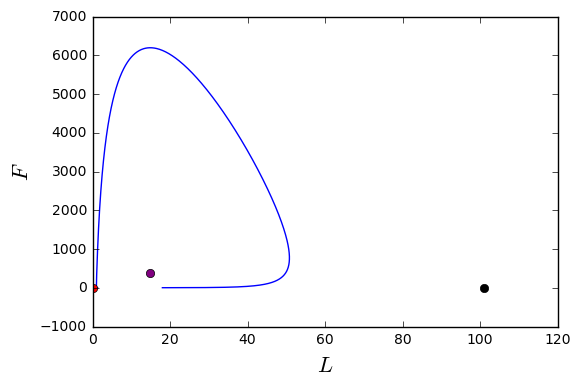

In [14]:
t = linspace(0,100,10000)

s = odeint(ActinLas, [18, 1], t)
plot(s[:, 0], s[:, 1])

plot(P1[0],P1[1],'o', color = 'red')
plot(P2[0],P2[1],'o', color = 'black')
plot(P3[0],P3[1],'o', color = 'purple')

#axis([13.9, 15.5, 1.3, 1.81])
xlabel(r'$L$', fontsize = 16)
ylabel(r'$F$', fontsize = 16)

Tal como usan los parámetros en el artículo se obtiene un valor de $b = 14.87$ el cual indica que ningún punto fijo es estable. De acuerdo a lo anterior modificamos los parámetros de $Ksev$ y $Kbr$ con el fin de que $b$ se ubicara en la zona donde uno de los puntos fijos es estable, obteniendo la siguiente gráfica con $b = 59.49$:

In [15]:
Kbr1 = 0.000957/2
Ksev1 = 0.427*2
B = Ksev1 / (Kbr1 * l)
A = K0 / (Kbr1 * alpha)
print 'B = ',B
P11 = [0,0]
P21 = [L2,0]
P31 = [B,A*B*(L2-B)]
print 'Punto 1 = ',P11
print 'Punto 2 = ',P21
print 'Punto 3 = ',P31

B =  59.491466388
Punto 1 =  [0, 0]
Punto 2 =  [101.0, 0]
Punto 3 =  [59.49146638801811, 1491.2956975719223]


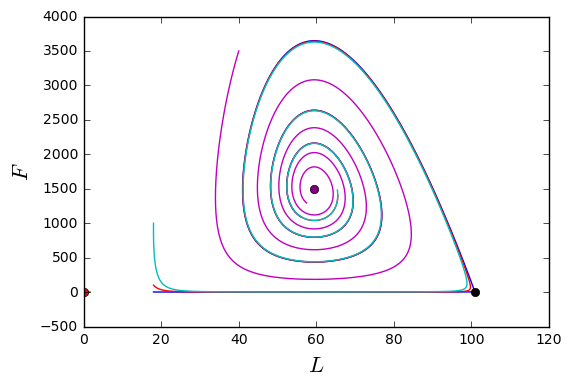

In [19]:
t = linspace(0,100,10000)


s = odeint(ActinLas2, [18, 1], t)
plot(s[:, 0], s[:, 1])
s = odeint(ActinLas2, [1, 1], t)
plot(s[:, 0], s[:, 1])
s = odeint(ActinLas2, [18, 100], t)
plot(s[:, 0], s[:, 1])
s = odeint(ActinLas2, [18, 1000], t)
plot(s[:, 0], s[:, 1])
s = odeint(ActinLas2, [40, 3500], t)
plot(s[:, 0], s[:, 1])


plot(P11[0],P11[1],'o', color = 'red')
plot(P21[0],P21[1],'o', color = 'black')
plot(P31[0],P31[1],'o', color = 'purple')


#axis([-1, 1, 0, 100])
xlabel(r'$L$', fontsize = 16)
ylabel(r'$F$', fontsize = 16)

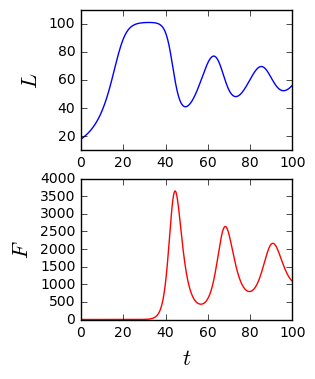

In [18]:
t = linspace(0,100,10000)

s = odeint(ActinLas2, [18, 1], t)
subplot (2, 2, 1)
plot(t, s[:, 0], color = 'blue')
#axis([0, 30, 0, 100])
ylabel(r'$L$', fontsize = 16)
subplot (2, 2, 3)
plot(t, s[:, 1], color = 'red')
#axis([0, 30, 0, 10000])
ylabel(r'$F$', fontsize = 16)

#axis([0, .2, 0, 1.1])
xlabel(r'$t$', fontsize = 16)

En el gráfico anterior se obtiene la estabilidad en uno de los puntos, el cual es una espiral convergente; sin embargo ya no se aprecia el pulso de filamentos de actina que favorece el proceso de endocitosis mediada por clatrina, sino que se observan varios pulsos de amplitudes decrecientes, lo cual no es una respuesta acorde con los resultados experimentales obtenidos por los investigadores.

______
A pesar de la inestabilidad de los puntos fijos inicialmente mencionada, el modelo se ajusta a los resultados experimentales, por cual acontinuación se simula con los valores propuestos en el artículo pero a un tiempo más largo y se obtiene lo siguiente:

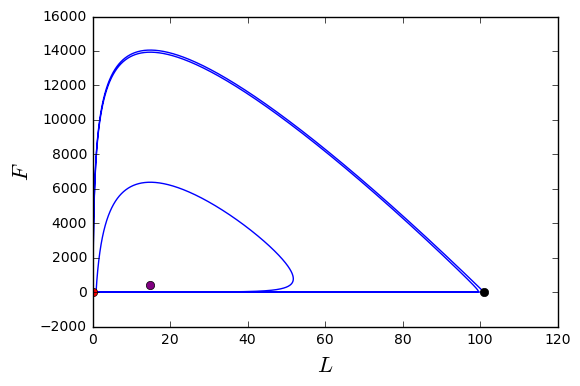

In [25]:
t = linspace(0,4000,1000000)


s = odeint(ActinLas, [20, 1], t)
plot(s[:, 0], s[:, 1])



plot(P1[0],P1[1],'o', color = 'red')
plot(P2[0],P2[1],'o', color = 'black')
plot(P3[0],P3[1],'o', color = 'purple')


#axis([0, 120, 0, 3000])
xlabel(r'$L$', fontsize = 16)
ylabel(r'$F$', fontsize = 16)

En la figura anterior descubrimos que a tiempos muy largos el sistema describe una oscilación denominada ciclo límite y el cual representa la convergencia del sistema a una región estable. Esta estabilidad se genera cuando se cumplen varias condiciones específicas, que uno de los puntos fijos tenga una dirección atractora y una dirección repulsora con tiempo de relajación infinito en la vecindad de ese punto fijo (0,0); la otra condición es que el punto fijo (101,0) sea punto silla y que el tercer punto fijo sea una fuente espiral.

_____
## Conclusiones 

EL modelo de FitzHugh-Nagumo se ajusta a los datos experimentales del artículo estudiado solamente a tiempos cortos (menores al tiempo que dura la endocitosis) y moviendo el tercer punto fijo cerca al vector propio $v_2$ del primer punto fijo.

El analisis de estabilidad también permitió explorar el modelo más a fondo y encontrar un ciclo límite a tiempos más largos, sin embargo alcanzar dicho ciclo no es posible biológicamente dado que las condiciones de la célula están cambiando constantemente.

Presentado por:

### Ángela María Jaramillo Granada
### Leonardo López Ortiz
### Alberto Luis Ramírez Hurtado

____
Este proyecto fue basado en el artículo:

#### Biophys J. 2016 Mar 29;110(6):1430-43. doi: 10.1016/j.bpj.2016.02.018. Actin-Regulator Feedback Interactions during Endocytosis. Wang X, Galletta BJ, Cooper JA, Carlsson AE.

___
Un especial agradecimiento al Dr. Moises Santillan y al CONACYT
